# Voorbeelden logistic regression

## Student admission

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, datasets

In dit voorbeeld wordt een logistic regression model gebruikt om te voorspellen of een student tot een bepaalde opleiding zal worden toegelaten.
Stel dat je de kans tot toetreding van een kandidaat student baseert op de scores die hij/zij behaalt op twee verschillende examens.
Je beschikt over historische data van vroegere kandidaten. Deze data is te vinden in het bestand *StudentAdmission.csv*. 
Voor elke training sample beschikken we over de kandidaat zijn/haar scores voor de twee verschillende examens alsook het uiteindelijke oordeel of deze persoon al dan niet werd toegelaten.
De taak bestaat erin een classifier te ontwerpen die op basis van de examenscores van een nieuwe kandidaat de kans bepaalt dat hij of zij wordt toegelaten.



### Inladen en visualiseren van de data

Laad de data in en stop ze in een Panda's dataframe.

In [4]:
# Inladen van de data

datasetAdmission = pd.read_csv('StudentAdmission.csv')
datasetAdmission.head()

,Score1,Score2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


**Scatterplot**

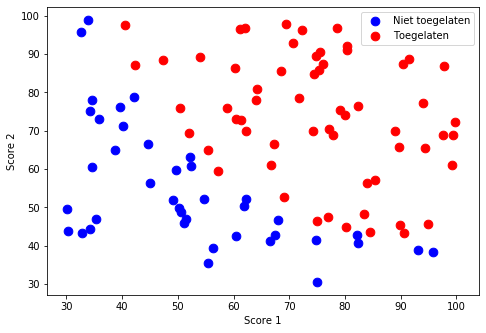

In [5]:
# Visualiseren van de data in een scatterplot

x1 = datasetAdmission[['Score1']].values
x2 = datasetAdmission[['Score2']].values
y = datasetAdmission[['Admission']].values

zero_class = (y ==0)
one_class =  (y==1)


labels = ['Niet toegelaten', 'Toegelaten']
fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])
ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=75, label='Niet toegelaten')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=75, label='Toegelaten')
ax_admission.set_xlabel('Score 1')
ax_admission.set_ylabel('Score 2')
ax_admission.legend(loc=1,numpoints=1)

Train een logistic regression model. 

In [6]:
features = list(datasetAdmission.columns[:2])
print(features)
X = datasetAdmission[features].values 

y= datasetAdmission['Admission'].values

logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(X, y)

['Score1', 'Score2']


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Visualiseren van de decision boundary

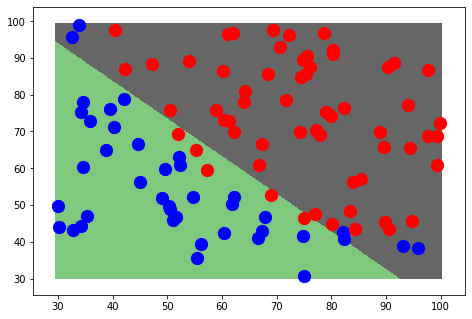

In [7]:
# Visualiseren van de decision boundary
h = 0.1
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])

Z = Z.reshape(xx.shape)

ax_admission.pcolormesh(xx, yy, Z,cmap='Accent')

ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=150, label='Niet toegelaten')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=150, label='Toegelaten')

Voorspel of een nieuwe kandidaat met een score op het eerste examen van 45 en een score van 85 op het tweede examen al dan niet zal worden toegelaten. Vergelijk de voorspelling met de grafische voorstelling van de decision boundary.

In [8]:
print(logreg.predict(np.array([45,85]).reshape(1, -1)))

[1]


**Gebruiken van hogere orde features**

(347, 354)


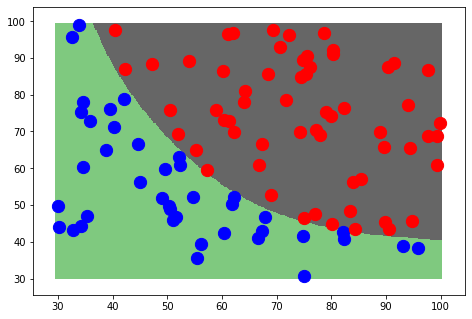

In [9]:
# Aanmaken van de hogere orde features
graad = 4

poly = PolynomialFeatures(graad)
Xp = poly.fit_transform(X)


# Train model op hogere orde features en visualiseer de decision boundary

logreg_poly = linear_model.LogisticRegression(C=1,solver='liblinear')
logreg_poly.fit(Xp, y)


# Visualiseren van de decision boundary
h = 0.2
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

XXp = np.c_[xx.ravel(), yy.ravel()]


xx_p = poly.fit_transform(XXp)


Z = logreg_poly.predict(xx_p)

fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])


print(xx.shape)
Z = Z.reshape(xx.shape)

ax_admission.pcolormesh(xx, yy, Z,cmap='Accent')

ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=150, label='Niet toegelaten')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=150, label='Toegelaten')




## Kwaliteitscontrole

In dit deel van de opdracht zal je geregulariseerde logistic regressie toepassen om te voorspellen of een zonnecel die aan twee verschillende testen werd onderworpen correct werkt.
Je beschikt over testresulaten van een aantal zonnecellen uit het verleden in het bestand *Kwaliteitscontrole.csv* waarop je het logistic regression model kan trainen.

Zoek een performant model dat je op basis van twee testen betrouwbaar kan zeggen of je een bepaalde zonnecel moet accepteren of verwerpen.




### Inladen en visualiseren van de data

In [10]:
# Inlezen van de dataset
dataset_QC = pd.read_csv('Kwaliteitscontrole.csv')
dataset_QC.head()

,Test1,Test2,WerktCorrect
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Visualiseer de data met behulp van een scatterplot. Duid de twee verschillende klasses (geaccepteerd of verworpen) aan met een verschillend symbool of kleur. 

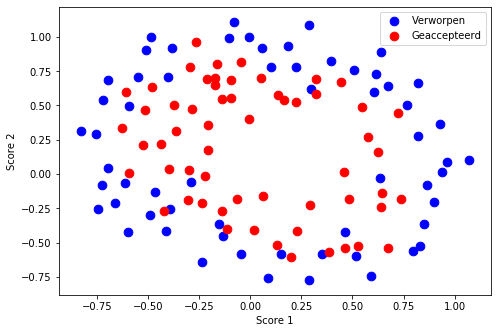

In [11]:
# Visualiseren van de data in een scatterplot

x1 = dataset_QC[['Test1']].values
x2 = dataset_QC[['Test2']].values
y = dataset_QC[['WerktCorrect']].values

zero_class = (y ==0)
one_class =  (y==1)


labels = ['Verworpen', 'Geaccepteerd']
fig_QC = plt.figure()
ax_QC = fig_QC.add_axes([0,0,1,1])
ax_QC.scatter(x1[zero_class],x2[zero_class], c='b', s=75, label='Verworpen')
ax_QC.scatter(x1[one_class], x2[one_class], c='r',s=75, label='Geaccepteerd')
ax_QC.set_xlabel('Score 1')
ax_QC.set_ylabel('Score 2')
ax_QC.legend(loc=1,numpoints=1)



Train een logistic regression model. 

In [12]:
X = np.concatenate((x1,x2),1)
y=y.ravel()
logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Visualiseer de decision boundary en bespreek deze decision boundary. Hoe goed voorspelt het model de trainingset?

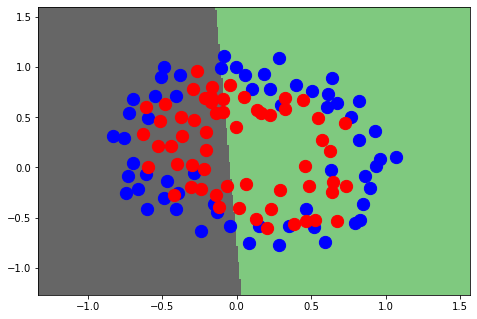

In [13]:
# Visualiseer de decision boundary
h = 0.01
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

fig_QC = plt.figure()
ax_QC = fig_QC.add_axes([0,0,1,1])

Z = Z.reshape(xx.shape)

ax_QC.pcolormesh(xx, yy, Z,cmap='Accent')

ax_QC.scatter(x1[zero_class],x2[zero_class], c='b', s=150, label='Verworpen')
ax_QC.scatter(x1[one_class], x2[one_class], c='r',s=150, label='Geaccepteerd')

**Hogere orde features**


(288, 291)


/home/florian/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


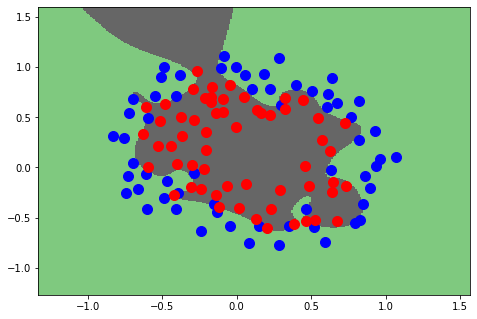

In [14]:
# Aanmaken van de hogere orde features
graad = 10

poly = PolynomialFeatures(graad)
Xp = poly.fit_transform(X)


# Train model op hogere orde features en visualiseer de decision boundary

logreg_poly = linear_model.LogisticRegression(C=10000000,solver='liblinear')
logreg_poly.fit(Xp, y)


# Visualiseren van de decision boundary
h = 0.01
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

XXp = np.c_[xx.ravel(), yy.ravel()]


xx_p = poly.fit_transform(XXp)


Z = logreg_poly.predict(xx_p)

fig_admission = plt.figure()
ax_admission = fig_admission.add_axes([0,0,1,1])


print(xx.shape)
Z = Z.reshape(xx.shape)

ax_admission.pcolormesh(xx, yy, Z,cmap='Accent')

ax_admission.scatter(x1[zero_class],x2[zero_class], c='b', s=100, label='Niet toegelaten')
ax_admission.scatter(x1[one_class], x2[one_class], c='r',s=100, label='Toegelaten')
